## Project 1: Monte Carlo Radiative Transfer
**PHY4905: Computational Physics**  
**Spring 2022**  
**Author: Sabahattin Mert Daloglu**

Photon number 6 escaped the gas cloud!
Photon number 8 escaped the gas cloud!
Photon number 21 escaped the gas cloud!
Photon number 49 escaped the gas cloud!
Photon number 51 escaped the gas cloud!
Photon number 53 escaped the gas cloud!
Photon number 54 escaped the gas cloud!
Photon number 56 escaped the gas cloud!
Photon number 57 escaped the gas cloud!
Photon number 63 escaped the gas cloud!
Photon number 64 escaped the gas cloud!
Photon number 82 escaped the gas cloud!
Photon number 86 escaped the gas cloud!
Photon number 93 escaped the gas cloud!


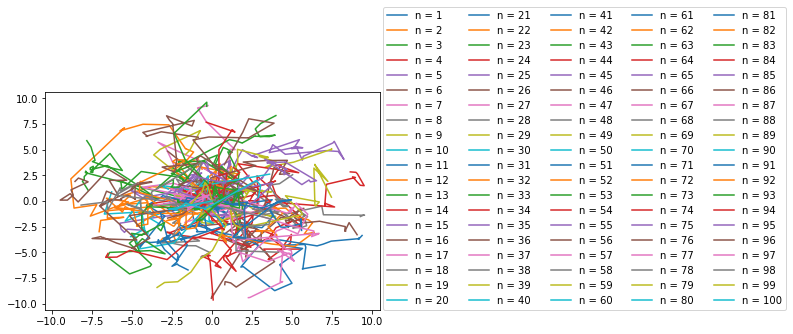

The fraction of emitted photons that are absorbed:  0.86

The fraction of emitted photons that escaped the max radius:  0.14

Average number of scatterings for escaping photons:  30.571428571428573

Average number of scatterings for absorbed photons:  11.430232558139535

The fraction of photons that experience zero scattering events:  0.04


In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
import math 


def rad_transfer(n,N,T,albedo):

    '''
    inputs:
    - n: number of photons
    - N: number of steps
    - T: Optical depth
    - albedo: Albedo of the gas particle
       substance with an albedo of 1 will scatter 100% of the photons
       substance with an albedo of 0 will absorb 100% of the photons
       
    outputs:
    - rad_transfer function makes a 2D plot of monte carlo radiative transfer
    - The fraction of emitted photons that are absorbed
    - The fraction of emitted photons that escaped the max radius
    - Average number of scatterings for escaping photons
    - Average number of scatterings for absorbed photons
    - The fraction of photons that experience zero scattering events
    
    Additionally while tracking a specific photon, the function prints out a statement
    whether the photon escapes the gas cloud with its number assigned to the plot legend. 
    Details of the function can be found in the project report
    
    '''
    
    albedo_option = ["scattering","absorbing"] #Two possible interaction options.
    angle = np.linspace(0.0,2*math.pi,361)    #azimuthal angle options.
    absorbed = []    #storing absorbed photons in this array for the analysis.
    escaped = []     #storing escaped photons in this array for the analysis.
    total_scat_absorbed = 0    #length of 'scat_absorbed' is added before a photon is absorbed.
    total_scat_escaped = 0    #length of 'scat_escaped' is added before a photon escapes.
    zero_scatter = 0    #A count of '1' is added for zero scattering events.

    
    for m in range(n):    #Itirates over number of photons
        
        scattered = []    #storing scattered photons in this array for the analysis
        scat_escaped = []    #re-assigning scattered array for escaped photons only
        scat_absorbed = []    #re-assigning scattered array for absorbed photons only
        
        i,j = 0,0    #Start point(star's location)
        location_x = [i]    #this array stores the x values of photon's location
        location_y = [j]    #this array stores the y values of photon's location

        #Transformation method to generate random distance traveled given non-uniform PDF
        z = random.random()    #generate uniform random numbers 𝑧 
        s = -math.log(1-z)/T    #distance before interaction(using transformation method)

        #Randomly choosing direction's angle
        theta = np.random.choice(angle)
        
        #Converting polar coordinates into cartesian
        i += s*math.cos(theta)
        j += s*math.sin(theta)
        
        #These first x and y values are generated disregarding the albedo
        #Because this step is the initial distance a photon travels right
        #after it is emitted from a star.
        location_x.append(i)
        location_y.append(j)


        for k in range(N):    #Itirates over number of steps


            #substance with an albedo of 1 will scatter 100% of the photons
            #substance with an albedo of 0 will absorb 100% of the photons
            albedo_choice = np.random.choice(albedo_option,p=[albedo,1-albedo])

            if albedo_choice=="scattering":
                
                if i**2+j**2<=100:    #within the escape radius in polar coordinates r=10
                    
                    z1 = random.random()    #generate uniform random numbers 𝑧1 
                    s = -math.log(1-z1)/T    #distance before interaction(using transformation method)
                    theta_new = np.random.choice(angle)    #Randomly choosing direction's angle
                    i += s*math.cos(theta_new)
                    j += s*math.sin(theta_new)
                    scattered.append(1)
                    
                else:
                    print(f'Photon number {m+1} escaped the gas cloud!')
                    escaped.append(1)
                    scat_escaped = scattered
                    total_scat_escaped += len(scat_escaped)
                    #All the previous scattering events are now assigned to 'scat_escaped'
                    #This step is to distinguish scattering events of absorbed photons
                    #from the photons that escaped.
                    break


            elif albedo_choice=="absorbing":
                
                if i**2+j**2>100: #within the escape radius in polar coordinates r=10
                    
                    #This condition makes sure that if any previous scattering event
                    #pushed the photon outside of the max radius then it should still
                    #be counted under 'escaped' array, although 'absorbing' is chosen.
                    print(f'Photon number {m+1} escaped the gas cloud!')
                    escaped.append(1)
                    scat_escaped = scattered
                    total_scat_escaped += len(scat_escaped)
                    #All the previous scattering events are now assigned to 'scat_escaped'
                    break
                    
                else:
                    absorbed.append(1)
                    scat_absorbed = scattered
                    #All the previous scattering events are now assigned to 'scat_absorbed'
                    if len(scat_absorbed)==0:
                        """
                        This condition is met when a specific photon is absorbed
                        without undergoing any scattering.(zero-scattering event)
                        """
                        zero_scatter += 1
                    
                    else:    
                        total_scat_absorbed += len(scat_absorbed)
                    break
                    
            if i**2+j**2<=100:
                #Appending location values only if the photon is still in the max radius
                location_x.append(i)
                location_y.append(j)
            
        plt.plot(location_x,location_y, label=f'n = {m+1}')

        

    plt.legend(loc=(1.01,0),ncol=5, fontsize=10)
    plt.show()
    print("The fraction of emitted photons that are absorbed: ", len(absorbed)/n)
    print("\nThe fraction of emitted photons that escaped the max radius: ", len(escaped)/n)
    if len(escaped)==0:
        print("\nAll the photons were absorbed before escaping the gas cloud of radius 10 units away")
    else:
        print("\nAverage number of scatterings for escaping photons: ", total_scat_escaped/len(escaped))
    print("\nAverage number of scatterings for absorbed photons: ", total_scat_absorbed/len(absorbed))
    print("\nThe fraction of photons that experience zero scattering events: ", zero_scatter/n )
    
rad_transfer(100,100,1,0.95)

Photon number 2 escaped the gas cloud!
Photon number 3 escaped the gas cloud!
Photon number 4 escaped the gas cloud!
Photon number 5 escaped the gas cloud!
Photon number 9 escaped the gas cloud!
Photon number 10 escaped the gas cloud!
Photon number 12 escaped the gas cloud!
Photon number 13 escaped the gas cloud!
Photon number 15 escaped the gas cloud!
Photon number 17 escaped the gas cloud!
Photon number 18 escaped the gas cloud!
Photon number 21 escaped the gas cloud!
Photon number 22 escaped the gas cloud!
Photon number 23 escaped the gas cloud!
Photon number 25 escaped the gas cloud!
Photon number 26 escaped the gas cloud!
Photon number 28 escaped the gas cloud!
Photon number 29 escaped the gas cloud!
Photon number 34 escaped the gas cloud!
Photon number 35 escaped the gas cloud!
Photon number 36 escaped the gas cloud!
Photon number 38 escaped the gas cloud!
Photon number 40 escaped the gas cloud!
Photon number 41 escaped the gas cloud!
Photon number 43 escaped the gas cloud!
Photo

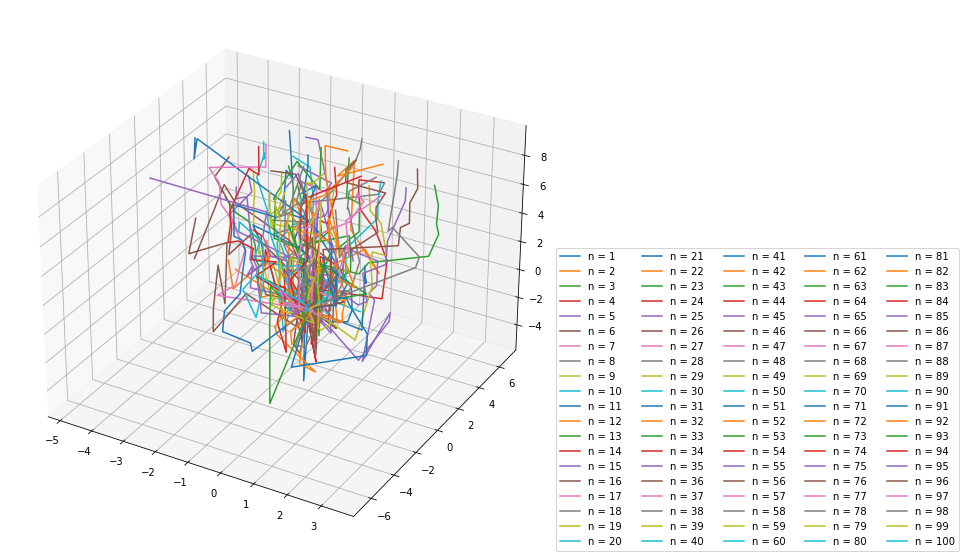

The fraction of emitted photons that are absorbed:  0.42

The fraction of emitted photons that escaped the max radius:  0.58

Average number of scatterings for escaping photons:  9.810344827586206

Average number of scatterings for absorbed photons:  3.4285714285714284

The fraction of photons that experience zero scattering events:  0.07


In [2]:
import random
import numpy as np
import matplotlib.pyplot as plt
import math 
from mpl_toolkits.mplot3d import Axes3D

def rad_transfer3D(n,N,T,albedo):
    
    '''
    inputs:
    - n: number of photons
    - N: number of steps
    - T: Optical depth
    - albedo: Albedo of the gas particle
       substance with an albedo of 1 will scatter 100% of the photons
       substance with an albedo of 0 will absorb 100% of the photons
       
    outputs:
    - rad_transfer3D function makes a 3D plot of monte carlo radiative transfer
    - The fraction of emitted photons that are absorbed
    - The fraction of emitted photons that escaped the max radius
    - Average number of scatterings for escaping photons
    - Average number of scatterings for absorbed photons
    - The fraction of photons that experience zero scattering events
    
    Additionally while tracking a specific photon, the function prints out a statement
    whether the photon escapes the gas cloud with its number assigned to the plot legend. 
    Details of the function can be found in the project report
    
    '''
    #3D figure is enabled at the beginning for the plots
    fig=plt.figure(figsize=(10,10))
    ax= plt.axes(projection='3d')
    
    albedo_option = ["scattering","absorbing"]    #Two possible interaction options.
    angle = np.linspace(0.0,2*math.pi,361)    #azimuthal angle options.
    absorbed = []    #storing absorbed photons in this array for the analysis.
    escaped = []    #storing escaped photons in this array for the analysis.
    total_scat_absorbed = 0    #length of 'scat_absorbed' is added before a photon is absorbed.
    total_scat_escaped = 0    #length of 'scat_escaped' is added before a photon escapes.
    zero_scatter = 0    #A count of '1' is added for zero scattering events.
    
    for m in range(n):    #Itirates over number of photons
        
        scattered = []    #storing scattered photons in this array for the analysis
        scat_escaped = []    #re-assigning scattered array for escaped photons only
        scat_absorbed = []    #re-assigning scattered array for absorbed photons only
        
        i,j,k = 0,0,0    #Start point(star's location)
        location_x = [i]    #this array stores the x values of photon's location
        location_y = [j]    #this array stores the y values of photon's location
        location_z = [k]    #this array stores the z values of photon's location

        #Transformation method to generate random distance traveled given non-uniform PDF
        z = random.random()    #generate uniform random numbers 𝑧 
        s = -math.log(1-z)/T    #distance before interaction(using transformation method)
        
        #Randomly choosing direction's angle(azimuthal)
        phi = np.random.choice(angle)
        
        #Transformation method to generate polar angle given non-uniform PDF
        z1 = random.random()
        theta = math.acos(1-2*z1)

        i += s*math.cos(theta)*math.sin(phi)
        j += s*math.sin(theta)*math.sin(phi)
        k += s*math.cos(phi)
        
        #These first x, y, and z values are generated disregarding the albedo
        #Because this step is the initial distance a photon travels right
        #after it is emitted from a star.
        location_x.append(i)
        location_y.append(j)
        location_z.append(k)


        for k in range(N):    #Itirates over number of steps


            #substance with an albedo of 1 will scatter 100% of the photons
            #substance with an albedo of 0 will absorb 100% of the photons
            albedo_choice = np.random.choice(albedo_option,p=[albedo,1-albedo])

            if albedo_choice=="scattering":
                
                if i**2+j**2+k**2<=100:    #within the escape radius in polar coordinates r=10
                    
                    z2 = random.random()    #generate uniform random numbers z2 
                    s = -math.log(1-z2)/T    #distance before interaction(using transformation method)
                    phi_new = np.random.choice(angle)   #Randomly choosing direction's angle(azimuthal)
                    
                    #generate polar angle(using transformation method)
                    z3 = random.random()
                    theta_new = math.acos(1-2*z3)
                    i += s*math.cos(theta_new)*math.sin(phi_new)
                    j += s*math.sin(theta_new)*math.sin(phi_new)
                    k += s*math.cos(phi_new)
                    scattered.append(1)
                    
                else:
                    print(f'Photon number {m+1} escaped the gas cloud!')
                    escaped.append(1)
                    scat_escaped = scattered
                    total_scat_escaped += len(scat_escaped)
                    #All the previous scattering events are now assigned to 'scat_escaped'
                    #This step is to distinguish scattering events of absorbed photons
                    #from the photons that escaped.
                    break


            elif albedo_choice=="absorbing":
                
                if i**2+j**2+k**2>100:   #within the escape radius in polar coordinates r=10
                    
                    #This condition makes sure that if any previous scattering event
                    #pushed the photon outside of the max radius then it should still
                    #be counted under 'escaped' array, although 'absorbing' is chosen.
                    print(f'Photon number {m+1} escaped the gas cloud!')
                    escaped.append(1)
                    scat_escaped = scattered
                    total_scat_escaped += len(scat_escaped)
                    #All the previous scattering events are now assigned to 'scat_escaped'
                    break
                    
                else:
                    absorbed.append(1)
                    scat_absorbed = scattered
                    #All the previous scattering events are now assigned to 'scat_absorbed'
                    if len(scat_absorbed)==0:
                        """
                        This condition is met when a specific photon is absorbed
                        without undergoing any scattering.(zero-scattering event)
                        """
                        zero_scatter += 1
                    else:    
                        total_scat_absorbed += len(scat_absorbed)
                    break
                    
            if i**2+j**2+k**2<=100:
                #Appending location values only if the photon is still in the max radius
                location_x.append(i)
                location_y.append(j)
                location_z.append(k)
            
            
        ax.plot3D(location_x,location_y,location_z,label=f'n = {m+1}')
        
    
    plt.legend(loc=(1.01,0),ncol=5, fontsize=10)
    plt.show()
    print("The fraction of emitted photons that are absorbed: ", len(absorbed)/n)
    print("\nThe fraction of emitted photons that escaped the max radius: ", len(escaped)/n)
    if len(escaped)==0:
        print("\nAll the photons were absorbed before escaping the gas cloud of radius 10 units away")
    else:
        print("\nAverage number of scatterings for escaping photons: ", total_scat_escaped/len(escaped))
    
    print("\nAverage number of scatterings for absorbed photons: ", total_scat_absorbed/len(absorbed))
    print("\nThe fraction of photons that experience zero scattering events: ", zero_scatter/n )
rad_transfer3D(100,100,1,0.95)

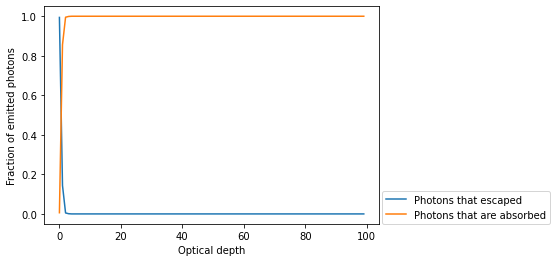

In [70]:
def analysis_optical(start,stop,step):
    
    """
    start: start value of the optical depth
    end: end value of the optical depth
    step: steps of changing the optical depth
    """
    
    N = 1000
    n = 1000
    albedo = 0.95
    escaped_photons = []
    absorbed_photons = []
    x = []
    for T in np.arange(start,stop,step):
        
        albedo_option = ["scattering","absorbing"]
        angle = np.linspace(0.0,2*math.pi,361)
        absorbed = []
        escaped = []
        total_scat_absorbed = 0
        total_scat_escaped = 0
        zero_scatter = 0
        
        for m in range(n):
            
            scattered = []
            scat_escaped = []
            scat_absorbed = []

            i,j = 0,0    #Start point(star's location)
            location_x = [i]
            location_y = [j]

            #Transformation method to generate random distance traveled given non-uniform PDF


            z = random.random()    #generate uniform random numbers 𝑧 
            s = -math.log(1-z)/T    #distance before interaction(using transformation method)

            theta = np.random.choice(angle)
            i += s*math.cos(theta)
            j += s*math.sin(theta)
            location_x.append(i)
            location_y.append(j)


            for k in range(N):


                #substance with an albedo of 1 will scatter 100% of the photons
                #substance with an albedo of 0 will absorb 100% of the photons
                albedo_choice = np.random.choice(albedo_option,p=[albedo,1-albedo])

                if albedo_choice=="scattering":

                    if i**2+j**2<=100:    #escape radius in polar coordinate is -10<r<10
                        z1 = random.random()    #generate uniform random numbers 𝑧 
                        s = -math.log(1-z1)/T    #distance before interaction(using transformation method)
                        theta_new = np.random.choice(angle)
                        i += s*math.cos(theta_new)
                        j += s*math.sin(theta_new)
                        scattered.append(1)

                    else:
                        escaped.append(1)
                        scat_escaped = scattered
                        total_scat_escaped += len(scat_escaped)
                        break


                elif albedo_choice=="absorbing":

                    if i**2+j**2>100:
                        escaped.append(1)
                        scat_escaped = scattered
                        total_scat_escaped += len(scat_escaped)
                        break

                    else:
                        absorbed.append(1)
                        scat_absorbed = scattered
                        if len(scat_absorbed)==0:
                            """
                            This condition is met when a specific photon is absorbed
                            without undergoing any scattering.(zero-scattering event)
                            """
                            zero_scatter += 1

                        else:    
                            total_scat_absorbed += len(scat_absorbed)
                        break
                
                if i**2+j**2<=100:    
                    location_x.append(i)
                    location_y.append(j)



        x.append(T)
        escaped_photons.append(len(escaped)/n)
        absorbed_photons.append(len(absorbed)/n)
        
        
    plt.plot(x,escaped_photons, label = 'Photons that escaped' )
    plt.plot(x,absorbed_photons, label = 'Photons that are absorbed' )
    plt.legend(loc=(1.01,0), fontsize=10)
    plt.xlabel('Optical depth')
    plt.ylabel('Fraction of emitted photons')
    plt.show()
    #plt.savefig('Opitcal depth vs fraction of emitted photons')
    
        
analysis_optical(0.01,100,1)

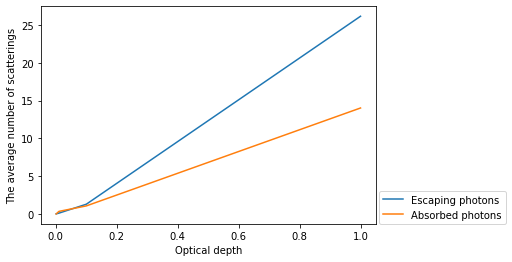

In [47]:
def analysis_optical1(start,stop,step):
    """
    start: power of 10(if entered -4: 1e-4)
    end: power of 10(if entered 5: 1e-5)
    step: step of the power
    """
    
    N = 1000
    n = 1000
    albedo = 0.95
    x = []
    tse = []
    tsa = []
    for T in range(start,stop+1,step):
        T = 10**(T)
        albedo_option = ["scattering","absorbing"]
        angle = np.linspace(0.0,2*math.pi,361)
        absorbed = []
        escaped = []
        total_scat_absorbed = 0
        total_scat_escaped = 0
        zero_scatter = 0
        
        for m in range(n):
            
            scattered = []
            scat_escaped = []
            scat_absorbed = []

            i,j = 0,0    #Start point(star's location)
            location_x = [i]
            location_y = [j]

            #Transformation method to generate random distance traveled given non-uniform PDF


            z = random.random()    #generate uniform random numbers 𝑧 
            s = -math.log(1-z)/T    #distance before interaction(using transformation method)

            theta = np.random.choice(angle)
            i += s*math.cos(theta)
            j += s*math.sin(theta)
            location_x.append(i)
            location_y.append(j)


            for k in range(N):


                #substance with an albedo of 1 will scatter 100% of the photons
                #substance with an albedo of 0 will absorb 100% of the photons
                albedo_choice = np.random.choice(albedo_option,p=[albedo,1-albedo])

                if albedo_choice=="scattering":

                    if i**2+j**2<=100:    #escape radius in polar coordinate is -10<r<10
                        z1 = random.random()    #generate uniform random numbers 𝑧 
                        s = -math.log(1-z1)/T    #distance before interaction(using transformation method)
                        theta_new = np.random.choice(angle)
                        i += s*math.cos(theta_new)
                        j += s*math.sin(theta_new)
                        scattered.append(1)

                    else:
                        escaped.append(1)
                        scat_escaped = scattered
                        total_scat_escaped += len(scat_escaped)
                        break


                elif albedo_choice=="absorbing":

                    if i**2+j**2>100:
                        escaped.append(1)
                        scat_escaped = scattered
                        total_scat_escaped += len(scat_escaped)
                        break

                    else:
                        absorbed.append(1)
                        scat_absorbed = scattered
                        if len(scat_absorbed)==0:
                            """
                            This condition is met when a specific photon is absorbed
                            without undergoing any scattering.(zero-scattering event)
                            """
                            zero_scatter += 1

                        else:    
                            total_scat_absorbed += len(scat_absorbed)
                        break

                if i**2+j**2<=100:
                    
                    location_x.append(i)
                    location_y.append(j)



        
        if len(escaped)!=0 and len(absorbed)!=0:
            tse.append(total_scat_escaped/len(escaped))
            tsa.append(total_scat_absorbed/len(absorbed))
            x.append(T)
            
        
        
    
    plt.plot(x,tse, label = 'Escaping photons' )
    plt.plot(x,tsa, label = 'Absorbed photons' )
    plt.legend(loc=(1.01,0), fontsize=10)
    plt.xlabel('Optical depth')
    plt.ylabel('The average number of scatterings')
    plt.show()
    #plt.savefig('Opitcal depth vs average number of scatterings')
    
analysis_optical1(-5,6,1)
        

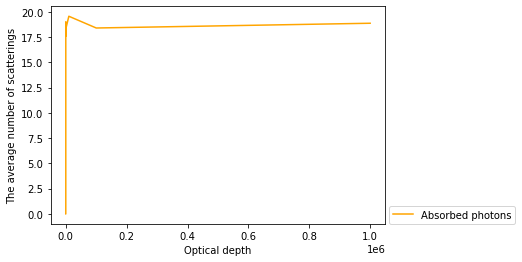

In [16]:
def analysis_optical2(start,stop,step):
    """
    start: power of 10(if entered -4: 1e-4)
    end: power of 10(if entered 5: 1e-5)
    step: step of the power
    """
    
    N = 1000
    n = 1000
    albedo = 0.95
    x = []
    tse = []
    tsa = []
    for T in range(start,stop+1,step):
        T = 10**(T)
        albedo_option = ["scattering","absorbing"]
        angle = np.linspace(0.0,2*math.pi,361)
        absorbed = []
        escaped = []
        total_scat_absorbed = 0
        total_scat_escaped = 0
        zero_scatter = 0
        
        for m in range(n):
            
            scattered = []
            scat_escaped = []
            scat_absorbed = []

            i,j = 0,0    #Start point(star's location)
            location_x = [i]
            location_y = [j]

            #Transformation method to generate random distance traveled given non-uniform PDF


            z = random.random()    #generate uniform random numbers 𝑧 
            s = -math.log(1-z)/T    #distance before interaction(using transformation method)

            theta = np.random.choice(angle)
            i += s*math.cos(theta)
            j += s*math.sin(theta)
            location_x.append(i)
            location_y.append(j)


            for k in range(N):


                #substance with an albedo of 1 will scatter 100% of the photons
                #substance with an albedo of 0 will absorb 100% of the photons
                albedo_choice = np.random.choice(albedo_option,p=[albedo,1-albedo])

                if albedo_choice=="scattering":

                    if i**2+j**2<=100:    #escape radius in polar coordinate is -10<r<10
                        z1 = random.random()    #generate uniform random numbers 𝑧 
                        s = -math.log(1-z1)/T    #distance before interaction(using transformation method)
                        theta_new = np.random.choice(angle)
                        i += s*math.cos(theta_new)
                        j += s*math.sin(theta_new)
                        scattered.append(1)

                    else:
                        escaped.append(1)
                        scat_escaped = scattered
                        total_scat_escaped += len(scat_escaped)
                        break


                elif albedo_choice=="absorbing":

                    if i**2+j**2>100:
                        escaped.append(1)
                        scat_escaped = scattered
                        total_scat_escaped += len(scat_escaped)
                        break

                    else:
                        absorbed.append(1)
                        scat_absorbed = scattered
                        if len(scat_absorbed)==0:
                            """
                            This condition is met when a specific photon is absorbed
                            without undergoing any scattering.(zero-scattering event)
                            """
                            zero_scatter += 1

                        else:    
                            total_scat_absorbed += len(scat_absorbed)
                        break

                if i**2+j**2<=100:
                    
                    location_x.append(i)
                    location_y.append(j)



        
        if len(absorbed)!=0:
            tsa.append(total_scat_absorbed/len(absorbed))
            x.append(T)
            
        
        
    plt.plot(x,tsa, label = 'Absorbed photons' , c='orange')
    plt.legend(loc=(1.01,0), fontsize=10)
    plt.xlabel('Optical depth')
    plt.ylabel('The average number of scatterings')
    plt.show()
    #plt.savefig('Opitcal depth vs average number of scatterings for absorbed photons')
        
analysis_optical2(-5,6,1)
        

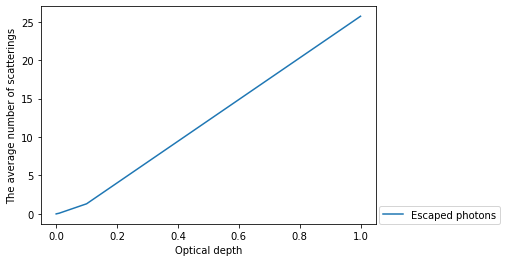

<Figure size 432x288 with 0 Axes>

In [19]:
def analysis_optical3(start,stop,step):
    """
    start: power of 10(if entered -4: 1e-4)
    end: power of 10(if entered 5: 1e-5)
    step: step of the power
    """
    
    N = 1000
    n = 1000
    albedo = 0.95
    x = []
    tse = []
    tsa = []
    for T in range(start,stop+1,step):
        T = 10**(T)
        albedo_option = ["scattering","absorbing"]
        angle = np.linspace(0.0,2*math.pi,361)
        absorbed = []
        escaped = []
        total_scat_absorbed = 0
        total_scat_escaped = 0
        zero_scatter = 0
        
        for m in range(n):
            
            scattered = []
            scat_escaped = []
            scat_absorbed = []

            i,j = 0,0    #Start point(star's location)
            location_x = [i]
            location_y = [j]

            #Transformation method to generate random distance traveled given non-uniform PDF


            z = random.random()    #generate uniform random numbers 𝑧 
            s = -math.log(1-z)/T    #distance before interaction(using transformation method)

            theta = np.random.choice(angle)
            i += s*math.cos(theta)
            j += s*math.sin(theta)
            location_x.append(i)
            location_y.append(j)


            for k in range(N):


                #substance with an albedo of 1 will scatter 100% of the photons
                #substance with an albedo of 0 will absorb 100% of the photons
                albedo_choice = np.random.choice(albedo_option,p=[albedo,1-albedo])

                if albedo_choice=="scattering":

                    if i**2+j**2<=100:    #escape radius in polar coordinate is -10<r<10
                        z1 = random.random()    #generate uniform random numbers 𝑧 
                        s = -math.log(1-z1)/T    #distance before interaction(using transformation method)
                        theta_new = np.random.choice(angle)
                        i += s*math.cos(theta_new)
                        j += s*math.sin(theta_new)
                        scattered.append(1)

                    else:
                        escaped.append(1)
                        scat_escaped = scattered
                        total_scat_escaped += len(scat_escaped)
                        break


                elif albedo_choice=="absorbing":

                    if i**2+j**2>100:
                        escaped.append(1)
                        scat_escaped = scattered
                        total_scat_escaped += len(scat_escaped)
                        break

                    else:
                        absorbed.append(1)
                        scat_absorbed = scattered
                        if len(scat_absorbed)==0:
                            """
                            This condition is met when a specific photon is absorbed
                            without undergoing any scattering.(zero-scattering event)
                            """
                            zero_scatter += 1

                        else:    
                            total_scat_absorbed += len(scat_absorbed)
                        break

                if i**2+j**2<=100:
                    
                    location_x.append(i)
                    location_y.append(j)



        
        if len(escaped)!=0:
            tse.append(total_scat_escaped/len(escaped))
            x.append(T)
            
        
        
    plt.plot(x,tse, label = 'Escaped photons' )
    plt.legend(loc=(1.01,0), fontsize=10)
    plt.xlabel('Optical depth')
    plt.ylabel('The average number of scatterings')
    plt.show()
    #plt.savefig('Opitcal depth vs average number of scatterings for escaped photons')   
analysis_optical3(-5,5,1)
        

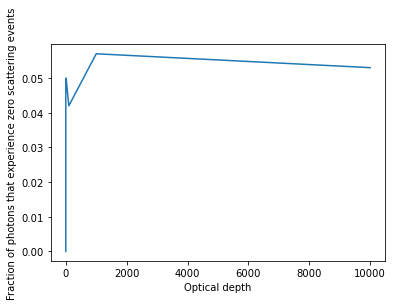

In [53]:
def analysis_optical4(start,stop,step):
    """
    start: power of 10(if entered -4: 1e-4)
    end: power of 10(if entered 5: 1e-5)
    step: step of the power
    """
    
    N = 1000
    n = 1000
    albedo = 0.95
    x = []
    na_scatter = []
    for T in range(start,stop+1,step):
        T = 10**(T)
        albedo_option = ["scattering","absorbing"]
        angle = np.linspace(0.0,2*math.pi,361)
        absorbed = []
        escaped = []
        total_scat_absorbed = 0
        total_scat_escaped = 0
        zero_scatter = []
        
        for m in range(n):

            scattered = []
            scat_escaped = []
            scat_absorbed = []

            i,j = 0,0    #Start point(star's location)
            location_x = [i]
            location_y = [j]

            #Transformation method to generate random distance traveled given non-uniform PDF


            z = random.random()    #generate uniform random numbers 𝑧 
            s = -math.log(1-z)/T    #distance before interaction(using transformation method)

            theta = np.random.choice(angle)
            i += s*math.cos(theta)
            j += s*math.sin(theta)
            location_x.append(i)
            location_y.append(j)


            for k in range(N):


                #substance with an albedo of 1 will scatter 100% of the photons
                #substance with an albedo of 0 will absorb 100% of the photons
                albedo_choice = np.random.choice(albedo_option,p=[albedo,1-albedo])

                if albedo_choice=="scattering":

                    if i**2+j**2<=100:    #escape radius in polar coordinate is -10<r<10
                        z1 = random.random()    #generate uniform random numbers 𝑧 
                        s = -math.log(1-z1)/T    #distance before interaction(using transformation method)
                        theta_new = np.random.choice(angle)
                        i += s*math.cos(theta_new)
                        j += s*math.sin(theta_new)
                        scattered.append(1)

                    else:
                        escaped.append(1)
                        scat_escaped = scattered
                        total_scat_escaped += len(scat_escaped)
                        break


                elif albedo_choice=="absorbing":

                    if i**2+j**2>100:
                        escaped.append(1)
                        scat_escaped = scattered
                        total_scat_escaped += len(scat_escaped)
                        break

                    else:
                        absorbed.append(1)
                        scat_absorbed = scattered
                        if len(scat_absorbed)==0:
                            """
                            This condition is met when a specific photon is absorbed
                            without undergoing any scattering.(zero-scattering event)
                            """
                            zero_scatter.append(1)

                        else:    
                            total_scat_absorbed += len(scat_absorbed)
                        break

                if i**2+j**2<=100:
                    
                    location_x.append(i)
                    location_y.append(j)



        
        na_scatter.append(len(zero_scatter)/n)
        x.append(T)
            
           
    plt.plot(x,na_scatter)
    plt.xlabel('Optical depth')
    plt.ylabel('Fraction of photons that experience zero scattering events')
    plt.show()
    #plt.savefig('Opitcal depth vs fraction of photons that experience 0scattering')    
analysis_optical4(-3,4,1)
        

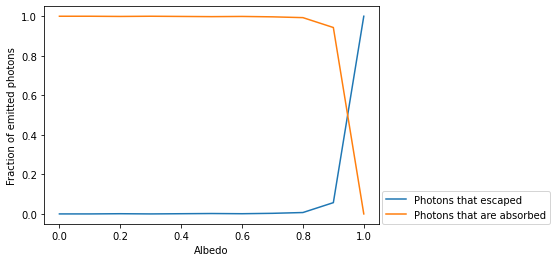

In [7]:
def analysis_albedo(start,stop,step):
    
    """
    start: start value of the albedo
    end: end value of the albedo
    step: steps of changing the aldebo
    """
    
    T = 1
    N = 1000
    n = 1000
    escaped_photons = []
    absorbed_photons = []
    x = []
    for albedo in np.arange(start,stop,step):
        
        albedo_option = ["scattering","absorbing"]
        angle = np.linspace(0.0,2*math.pi,361)
        absorbed = []
        escaped = []
        total_scat_absorbed = 0
        total_scat_escaped = 0
        zero_scatter = 0
        
        for m in range(n):
            
            scattered = []
            scat_escaped = []
            scat_absorbed = []

            i,j = 0,0    #Start point(star's location)
            location_x = [i]
            location_y = [j]

            #Transformation method to generate random distance traveled given non-uniform PDF


            z = random.random()    #generate uniform random numbers 𝑧 
            s = -math.log(1-z)/T    #distance before interaction(using transformation method)

            theta = np.random.choice(angle)
            i += s*math.cos(theta)
            j += s*math.sin(theta)
            location_x.append(i)
            location_y.append(j)


            for k in range(N):


                #substance with an albedo of 1 will scatter 100% of the photons
                #substance with an albedo of 0 will absorb 100% of the photons
                albedo_choice = np.random.choice(albedo_option,p=[albedo,1-albedo])

                if albedo_choice=="scattering":

                    if i**2+j**2<=100:    #escape radius in polar coordinate is -10<r<10
                        z1 = random.random()    #generate uniform random numbers 𝑧 
                        s = -math.log(1-z1)/T    #distance before interaction(using transformation method)
                        theta_new = np.random.choice(angle)
                        i += s*math.cos(theta_new)
                        j += s*math.sin(theta_new)
                        scattered.append(1)

                    else:
                        escaped.append(1)
                        scat_escaped = scattered
                        total_scat_escaped += len(scat_escaped)
                        break


                elif albedo_choice=="absorbing":

                    if i**2+j**2>100:
                        escaped.append(1)
                        scat_escaped = scattered
                        total_scat_escaped += len(scat_escaped)
                        break

                    else:
                        absorbed.append(1)
                        scat_absorbed = scattered
                        if len(scat_absorbed)==0:
                            """
                            This condition is met when a specific photon is absorbed
                            without undergoing any scattering.(zero-scattering event)
                            """
                            zero_scatter += 1

                        else:    
                            total_scat_absorbed += len(scat_absorbed)
                        break

                if i**2+j**2<=100:
                    
                    location_x.append(i)
                    location_y.append(j)



        x.append(albedo)
        escaped_photons.append(len(escaped)/n)
        absorbed_photons.append(len(absorbed)/n)
        
        
    plt.plot(x,escaped_photons, label = 'Photons that escaped' )
    plt.plot(x,absorbed_photons, label = 'Photons that are absorbed' )
    plt.legend(loc=(1.01,0), fontsize=10)
    plt.xlabel('Albedo')
    plt.ylabel('Fraction of emitted photons')
    plt.show()
    #plt.savefig('Albedo vs fraction of emitted photons')
    
        
analysis_albedo(0,1.1,0.1)

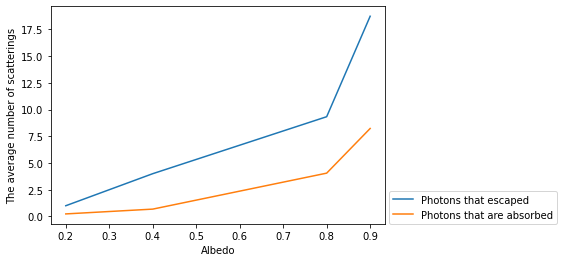

In [15]:
def analysis_albedo1(start,stop,step):
    
    """
    start: start value of the albedo
    end: end value of the albedo
    step: steps of changing the aldebo
    """
    
    T = 1
    N = 1000
    n = 1000
    x = []
    tse = []
    tsa = []
    for albedo in np.arange(start,stop,step):
        
        albedo_option = ["scattering","absorbing"]
        angle = np.linspace(0.0,2*math.pi,361)
        absorbed = []
        escaped = []
        total_scat_absorbed = 0
        total_scat_escaped = 0
        zero_scatter = 0
        
        for m in range(n):
            
            scattered = []
            scat_escaped = []
            scat_absorbed = []

            i,j = 0,0    #Start point(star's location)
            location_x = [i]
            location_y = [j]

            #Transformation method to generate random distance traveled given non-uniform PDF


            z = random.random()    #generate uniform random numbers 𝑧 
            s = -math.log(1-z)/T    #distance before interaction(using transformation method)

            theta = np.random.choice(angle)
            i += s*math.cos(theta)
            j += s*math.sin(theta)
            location_x.append(i)
            location_y.append(j)


            for k in range(N):


                #substance with an albedo of 1 will scatter 100% of the photons
                #substance with an albedo of 0 will absorb 100% of the photons
                albedo_choice = np.random.choice(albedo_option,p=[albedo,1-albedo])

                if albedo_choice=="scattering":

                    if i**2+j**2<=100:    #escape radius in polar coordinate is -10<r<10
                        z1 = random.random()    #generate uniform random numbers 𝑧 
                        s = -math.log(1-z1)/T    #distance before interaction(using transformation method)
                        theta_new = np.random.choice(angle)
                        i += s*math.cos(theta_new)
                        j += s*math.sin(theta_new)
                        scattered.append(1)

                    else:
                        escaped.append(1)
                        scat_escaped = scattered
                        total_scat_escaped += len(scat_escaped)
                        break


                elif albedo_choice=="absorbing":

                    if i**2+j**2>100:
                        escaped.append(1)
                        scat_escaped = scattered
                        total_scat_escaped += len(scat_escaped)
                        break

                    else:
                        absorbed.append(1)
                        scat_absorbed = scattered
                        if len(scat_absorbed)==0:
                            """
                            This condition is met when a specific photon is absorbed
                            without undergoing any scattering.(zero-scattering event)
                            """
                            zero_scatter += 1

                        else:    
                            total_scat_absorbed += len(scat_absorbed)
                        break

                if i**2+j**2<=100:
                    
                    location_x.append(i)
                    location_y.append(j)



    
        
        if len(escaped)!=0 and len(absorbed)!=0:
            tse.append(total_scat_escaped/len(escaped))
            tsa.append(total_scat_absorbed/len(absorbed))
            x.append(albedo)
        
    plt.plot(x,tse, label = 'Photons that escaped' )
    plt.plot(x,tsa, label = 'Photons that are absorbed' )
    plt.legend(loc=(1.01,0), fontsize=10)
    plt.xlabel('Albedo')
    plt.ylabel('The average number of scatterings')
    plt.show()
    #plt.savefig('Albedo vs average number of scatterings')
    
    
        
analysis_albedo1(0,1.1,0.1)

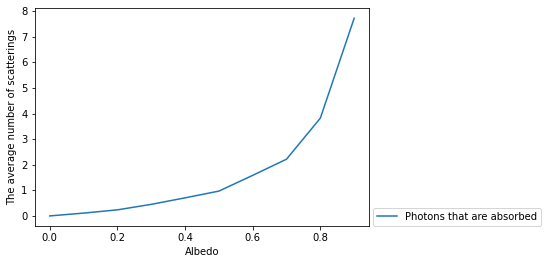

In [14]:
def analysis_albedo2(start,stop,step):

    """
    start: start value of the albedo
    end: end value of the albedo
    step: steps of changing the aldebo
    """
    
    T = 1
    N = 1000
    n = 1000
    x = []
    tse = []
    tsa = []
    for albedo in np.arange(start,stop,step):
        
        albedo_option = ["scattering","absorbing"]
        angle = np.linspace(0.0,2*math.pi,361)
        absorbed = []
        escaped = []
        total_scat_absorbed = 0
        total_scat_escaped = 0
        zero_scatter = 0
        
        for m in range(n):
            
            scattered = []
            scat_escaped = []
            scat_absorbed = []

            i,j = 0,0    #Start point(star's location)
            location_x = [i]
            location_y = [j]

            #Transformation method to generate random distance traveled given non-uniform PDF


            z = random.random()    #generate uniform random numbers 𝑧 
            s = -math.log(1-z)/T    #distance before interaction(using transformation method)

            theta = np.random.choice(angle)
            i += s*math.cos(theta)
            j += s*math.sin(theta)
            location_x.append(i)
            location_y.append(j)


            for k in range(N):


                #substance with an albedo of 1 will scatter 100% of the photons
                #substance with an albedo of 0 will absorb 100% of the photons
                albedo_choice = np.random.choice(albedo_option,p=[albedo,1-albedo])

                if albedo_choice=="scattering":

                    if i**2+j**2<=100:    #escape radius in polar coordinate is -10<r<10
                        z1 = random.random()    #generate uniform random numbers 𝑧 
                        s = -math.log(1-z1)/T    #distance before interaction(using transformation method)
                        theta_new = np.random.choice(angle)
                        i += s*math.cos(theta_new)
                        j += s*math.sin(theta_new)
                        scattered.append(1)

                    else:
                        escaped.append(1)
                        scat_escaped = scattered
                        total_scat_escaped += len(scat_escaped)
                        break


                elif albedo_choice=="absorbing":

                    if i**2+j**2>100:
                        escaped.append(1)
                        scat_escaped = scattered
                        total_scat_escaped += len(scat_escaped)
                        break

                    else:
                        absorbed.append(1)
                        scat_absorbed = scattered
                        if len(scat_absorbed)==0:
                            """
                            This condition is met when a specific photon is absorbed
                            without undergoing any scattering.(zero-scattering event)
                            """
                            zero_scatter += 1

                        else:    
                            total_scat_absorbed += len(scat_absorbed)
                        break

                if i**2+j**2<=100:
                    
                    location_x.append(i)
                    location_y.append(j)


    
        
        if len(absorbed)!=0:
            tsa.append(total_scat_absorbed/len(absorbed))
            x.append(albedo)
        
    plt.plot(x,tsa, label = 'Photons that are absorbed' )
    plt.legend(loc=(1.01,0), fontsize=10)
    plt.xlabel('Albedo')
    plt.ylabel('The average number of scatterings')
    plt.show()
    #plt.savefig('Albedo vs average number of scatterings for absorbed')
    
    
        
analysis_albedo2(0,1.1,0.1)

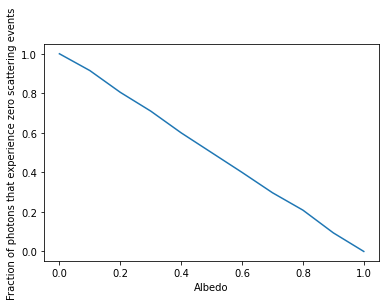

In [13]:
def analysis_albedo3(start,stop,step):
    
    """
    start: start value of the albedo
    end: end value of the albedo
    step: steps of changing the aldebo
    """
    
    T = 1
    N = 1000
    n = 1000
    x = []
    na_scatter = []
    for albedo in np.arange(start,stop,step):
        
        albedo_option = ["scattering","absorbing"]
        angle = np.linspace(0.0,2*math.pi,361)
        absorbed = []
        escaped = []
        total_scat_absorbed = 0
        total_scat_escaped = 0
        zero_scatter = 0
        
        for m in range(n):
            
            scattered = []
            scat_escaped = []
            scat_absorbed = []

            i,j = 0,0    #Start point(star's location)
            location_x = [i]
            location_y = [j]

            #Transformation method to generate random distance traveled given non-uniform PDF


            z = random.random()    #generate uniform random numbers 𝑧 
            s = -math.log(1-z)/T    #distance before interaction(using transformation method)

            theta = np.random.choice(angle)
            i += s*math.cos(theta)
            j += s*math.sin(theta)
            location_x.append(i)
            location_y.append(j)


            for k in range(N):


                #substance with an albedo of 1 will scatter 100% of the photons
                #substance with an albedo of 0 will absorb 100% of the photons
                albedo_choice = np.random.choice(albedo_option,p=[albedo,1-albedo])

                if albedo_choice=="scattering":

                    if i**2+j**2<=100:    #escape radius in polar coordinate is -10<r<10
                        z1 = random.random()    #generate uniform random numbers 𝑧 
                        s = -math.log(1-z1)/T    #distance before interaction(using transformation method)
                        theta_new = np.random.choice(angle)
                        i += s*math.cos(theta_new)
                        j += s*math.sin(theta_new)
                        scattered.append(1)

                    else:
                        escaped.append(1)
                        scat_escaped = scattered
                        total_scat_escaped += len(scat_escaped)
                        break


                elif albedo_choice=="absorbing":

                    if i**2+j**2>100:
                        escaped.append(1)
                        scat_escaped = scattered
                        total_scat_escaped += len(scat_escaped)
                        break

                    else:
                        absorbed.append(1)
                        scat_absorbed = scattered
                        if len(scat_absorbed)==0:
                            """
                            This condition is met when a specific photon is absorbed
                            without undergoing any scattering.(zero-scattering event)
                            """
                            zero_scatter += 1

                        else:    
                            total_scat_absorbed += len(scat_absorbed)
                        break

                if i**2+j**2<=100:
                    
                    location_x.append(i)
                    location_y.append(j)



        na_scatter.append(zero_scatter/n)
        x.append(albedo)
            
           
    plt.plot(x,na_scatter)
    plt.xlabel('Albedo')
    plt.ylabel('Fraction of photons that experience zero scattering events')
    plt.show()
    #plt.savefig('Albedo vs 0scattering')
    
    
        
analysis_albedo3(0,1.1,0.1)

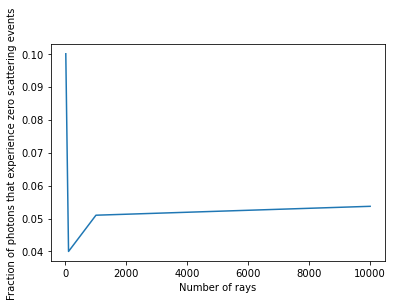

In [36]:
def analysis_rays(start,stop,step):
    """
    start: power of 10(if entered -4: 1e-4)
    end: power of 10(if entered 5: 1e-5)
    step: step of the power
    """
    T = 1
    N = 1000
    albedo = 0.95
    x = []
    na_scatter = []
    for n in np.arange(start,stop+1,step):
        n = 10**(n)
        albedo_option = ["scattering","absorbing"]
        angle = np.linspace(0.0,2*math.pi,361)
        absorbed = []
        escaped = []
        total_scat_absorbed = 0
        total_scat_escaped = 0
        zero_scatter = 0
        
        for m in np.arange(n):
            
            scattered = []
            scat_escaped = []
            scat_absorbed = []

            i,j = 0,0    #Start point(star's location)
            location_x = [i]
            location_y = [j]

            #Transformation method to generate random distance traveled given non-uniform PDF


            z = random.random()    #generate uniform random numbers 𝑧 
            s = -math.log(1-z)/T    #distance before interaction(using transformation method)

            theta = np.random.choice(angle)
            i += s*math.cos(theta)
            j += s*math.sin(theta)
            location_x.append(i)
            location_y.append(j)


            for k in range(N):


                #substance with an albedo of 1 will scatter 100% of the photons
                #substance with an albedo of 0 will absorb 100% of the photons
                albedo_choice = np.random.choice(albedo_option,p=[albedo,1-albedo])

                if albedo_choice=="scattering":

                    if i**2+j**2<=100:    #escape radius in polar coordinate is -10<r<10
                        z1 = random.random()    #generate uniform random numbers 𝑧 
                        s = -math.log(1-z1)/T    #distance before interaction(using transformation method)
                        theta_new = np.random.choice(angle)
                        i += s*math.cos(theta_new)
                        j += s*math.sin(theta_new)
                        scattered.append(1)

                    else:
                        escaped.append(1)
                        scat_escaped = scattered
                        total_scat_escaped += len(scat_escaped)
                        break


                elif albedo_choice=="absorbing":

                    if i**2+j**2>100:
                        escaped.append(1)
                        scat_escaped = scattered
                        total_scat_escaped += len(scat_escaped)
                        break

                    else:
                        absorbed.append(1)
                        scat_absorbed = scattered
                        if len(scat_absorbed)==0:
                            """
                            This condition is met when a specific photon is absorbed
                            without undergoing any scattering.(zero-scattering event)
                            """
                            zero_scatter += 1

                        else:    
                            total_scat_absorbed += len(scat_absorbed)
                        break

                if i**2+j**2<=100:
                    
                    location_x.append(i)
                    location_y.append(j)


        na_scatter.append(zero_scatter/n)
        x.append(n)
            
           
    plt.plot(x,na_scatter)
    plt.xlabel('Number of rays')
    plt.ylabel('Fraction of photons that experience zero scattering events')
    plt.show()
    #plt.savefig('Rays vs fraction of 0scattering ')
    
        
analysis_rays(1,4,1)

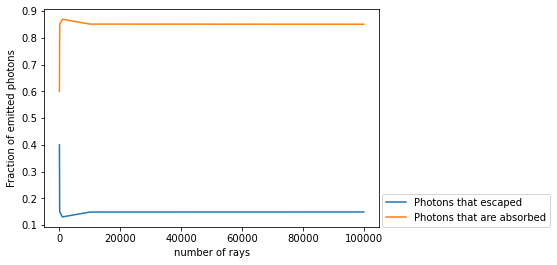

In [52]:
def analysis_rays1(start,stop,step):
    """
    start: power of 10(if entered -4: 1e-4)
    end: power of 10(if entered 5: 1e-5)
    step: step of the power
    """
    T = 1
    N = 1000
    albedo = 0.95
    escaped_photons = []
    absorbed_photons = []
    x = []
    for n in np.arange(start,stop+1,step):
        n = 10**n
        albedo_option = ["scattering","absorbing"]
        angle = np.linspace(0.0,2*math.pi,361)
        absorbed = []
        escaped = []
        total_scat_absorbed = 0
        total_scat_escaped = 0
        zero_scatter = 0
        
        for m in np.arange(n):
            
            scattered = []
            scat_escaped = []
            scat_absorbed = []

            i,j = 0,0    #Start point(star's location)
            location_x = [i]
            location_y = [j]

            #Transformation method to generate random distance traveled given non-uniform PDF


            z = random.random()    #generate uniform random numbers 𝑧 
            s = -math.log(1-z)/T    #distance before interaction(using transformation method)

            theta = np.random.choice(angle)
            i += s*math.cos(theta)
            j += s*math.sin(theta)
            location_x.append(i)
            location_y.append(j)


            for k in range(N):


                #substance with an albedo of 1 will scatter 100% of the photons
                #substance with an albedo of 0 will absorb 100% of the photons
                albedo_choice = np.random.choice(albedo_option,p=[albedo,1-albedo])

                if albedo_choice=="scattering":

                    if i**2+j**2<=100:    #escape radius in polar coordinate is -10<r<10
                        z1 = random.random()    #generate uniform random numbers 𝑧 
                        s = -math.log(1-z1)/T    #distance before interaction(using transformation method)
                        theta_new = np.random.choice(angle)
                        i += s*math.cos(theta_new)
                        j += s*math.sin(theta_new)
                        scattered.append(1)

                    else:
                        escaped.append(1)
                        scat_escaped = scattered
                        total_scat_escaped += len(scat_escaped)
                        break


                elif albedo_choice=="absorbing":

                    if i**2+j**2>100:
                        escaped.append(1)
                        scat_escaped = scattered
                        total_scat_escaped += len(scat_escaped)
                        break

                    else:
                        absorbed.append(1)
                        scat_absorbed = scattered
                        if len(scat_absorbed)==0:
                            """
                            This condition is met when a specific photon is absorbed
                            without undergoing any scattering.(zero-scattering event)
                            """
                            zero_scatter += 1

                        else:    
                            total_scat_absorbed += len(scat_absorbed)
                        break

                if i**2+j**2<=100:
                    
                    location_x.append(i)
                    location_y.append(j)

            
           
        x.append(n)
        escaped_photons.append(len(escaped)/n)
        absorbed_photons.append(len(absorbed)/n)
        
        
    plt.plot(x,escaped_photons, label = 'Photons that escaped' )
    plt.plot(x,absorbed_photons, label = 'Photons that are absorbed' )
    plt.legend(loc=(1.01,0), fontsize=10)
    plt.xlabel('number of rays')
    plt.ylabel('Fraction of emitted photons')
    plt.show()
    #plt.savefig('Rays vs fraction of photons escaped/absorbed ')
        
analysis_rays1(1,4,1)

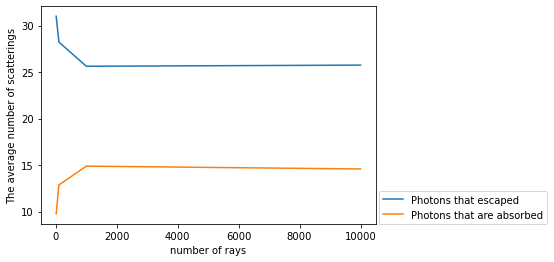

In [5]:
def analysis_rays2(start,stop,step):
    """
    start: power of 10(if entered -4: 1e-4)
    end: power of 10(if entered 5: 1e-5)
    step: step of the power
    """
    T = 1
    N = 1000
    albedo=0.95
    x = []
    tse = []
    tsa = []
    for n in np.arange(start,stop,step):
        n = 10**(n) 
        albedo_option = ["scattering","absorbing"]
        angle = np.linspace(0.0,2*math.pi,361)
        absorbed = []
        escaped = []
        total_scat_absorbed = 0
        total_scat_escaped = 0
        zero_scatter = 0
        
        for m in np.arange(n):
            
            scattered = []
            scat_escaped = []
            scat_absorbed = []

            i,j = 0,0    #Start point(star's location)
            location_x = [i]
            location_y = [j]

            #Transformation method to generate random distance traveled given non-uniform PDF


            z = random.random()    #generate uniform random numbers 𝑧 
            s = -math.log(1-z)/T    #distance before interaction(using transformation method)

            theta = np.random.choice(angle)
            i += s*math.cos(theta)
            j += s*math.sin(theta)
            location_x.append(i)
            location_y.append(j)


            for k in range(N):


                #substance with an albedo of 1 will scatter 100% of the photons
                #substance with an albedo of 0 will absorb 100% of the photons
                albedo_choice = np.random.choice(albedo_option,p=[albedo,1-albedo])

                if albedo_choice=="scattering":

                    if i**2+j**2<=100:    #escape radius in polar coordinate is -10<r<10
                        z1 = random.random()    #generate uniform random numbers 𝑧 
                        s = -math.log(1-z1)/T    #distance before interaction(using transformation method)
                        theta_new = np.random.choice(angle)
                        i += s*math.cos(theta_new)
                        j += s*math.sin(theta_new)
                        scattered.append(1)

                    else:
                        escaped.append(1)
                        scat_escaped = scattered
                        total_scat_escaped += len(scat_escaped)
                        break


                elif albedo_choice=="absorbing":

                    if i**2+j**2>100:
                        escaped.append(1)
                        scat_escaped = scattered
                        total_scat_escaped += len(scat_escaped)
                        break

                    else:
                        absorbed.append(1)
                        scat_absorbed = scattered
                        if len(scat_absorbed)==0:
                            """
                            This condition is met when a specific photon is absorbed
                            without undergoing any scattering.(zero-scattering event)
                            """
                            zero_scatter += 1

                        else:    
                            total_scat_absorbed += len(scat_absorbed)
                        break

                if i**2+j**2<=100:
                    
                    location_x.append(i)
                    location_y.append(j)



    
        
        if len(escaped)!=0 and len(absorbed)!=0:
            
            tse.append(total_scat_escaped/len(escaped))
            tsa.append(total_scat_absorbed/len(absorbed))
            x.append(n)
    
      
    plt.plot(x,tse, label = 'Photons that escaped' )
    plt.plot(x,tsa, label = 'Photons that are absorbed' )
    plt.legend(loc=(1.01,0), fontsize=10)
    plt.xlabel('number of rays')
    plt.ylabel('The average number of scatterings')
    plt.show()
    #plt.savefig('Rays vs avg number of scatterings ')
    
        
analysis_rays2(1,5,1)